In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
train.shape

(7043, 21)

In [ ]:
train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
train.TotalCharges = pd.to_numeric(train.TotalCharges, errors='coerce')

In [ ]:
train.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
train['TotalCharges'] = train['TotalCharges'].fillna(train['TotalCharges'].median())

In [ ]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
train[binary_cols] = train[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [ ]:
train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [ ]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
train.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
print ('Total Customer Loyal\t: {}'.format(train.Churn.value_counts()[0]))
print ('Total Customer Churn\t: {}'.format(train.Churn.value_counts()[1]))

Total Customer Loyal	: 5174
Total Customer Churn	: 1869


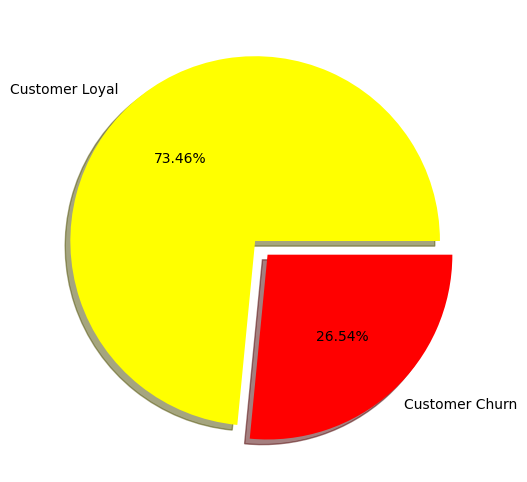

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(x=train["Churn"].value_counts(),
        colors=["yellow", "red"],
        labels=["Customer Loyal", "Customer Churn"],
        shadow = True,
        autopct="%1.2f%%",
        explode=(0, 0.1)
        )

plt.show()

In [ ]:
train.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
print ('Total Laki-laki\t: {}'.format(train.gender.value_counts()['Male']))
print ('Total Perempuan\t: {}'.format(train.gender.value_counts()['Female']))

Total Laki-laki	: 3555
Total Perempuan	: 3488


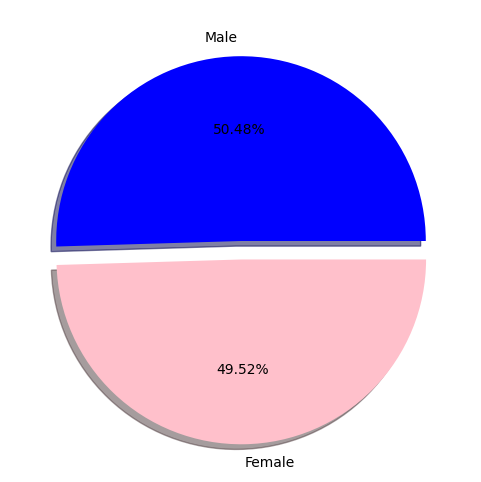

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(x=train["gender"].value_counts(),
        colors=["blue", "pink"],
        labels=["Male", "Female"],
        shadow = True,
        autopct="%1.2f%%",
        explode=(0, 0.1)
        )

plt.show()

In [ ]:
X = train.drop(columns=['Churn'])
Y = train['Churn']

In [ ]:
X = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print ('x_train length: ', len(x_train), '\nx_test length: ', len(x_test), '\ny_train length: ', len(y_train), '\ny_test length: ', len(x_test))

x_train length:  5634 
x_test length:  1409 
y_train length:  5634 
y_test length:  1409


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
RF_predict = RF.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, RF_predict)
print('accuracy dari model ini:', accuracy)

accuracy dari model ini: 0.8055358410220014


In [ ]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
predict_train = RF.predict(x_train)
predict_train

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
predict_test = RF.predict(x_test)
predict_test

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree_g = DecisionTreeClassifier(criterion='gini',max_depth=4)

In [ ]:
dtree_g.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=4)

In [ ]:
predictions = dtree_g.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
cla_CART = classification_report(y_test,predictions)
print("Classification Report:\n\n",cla_CART)

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
con_CART = confusion_matrix(y_test,predictions)
print("Confusion matrix:\n\n",con_CART)

Confusion matrix:

 [[945  91]
 [199 174]]


In [ ]:
acc_CART = accuracy_score(y_test,predictions)*100
print("Accuracy:",acc_CART,"%")

Accuracy: 79.4180269694819 %


In [ ]:
pip install six

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

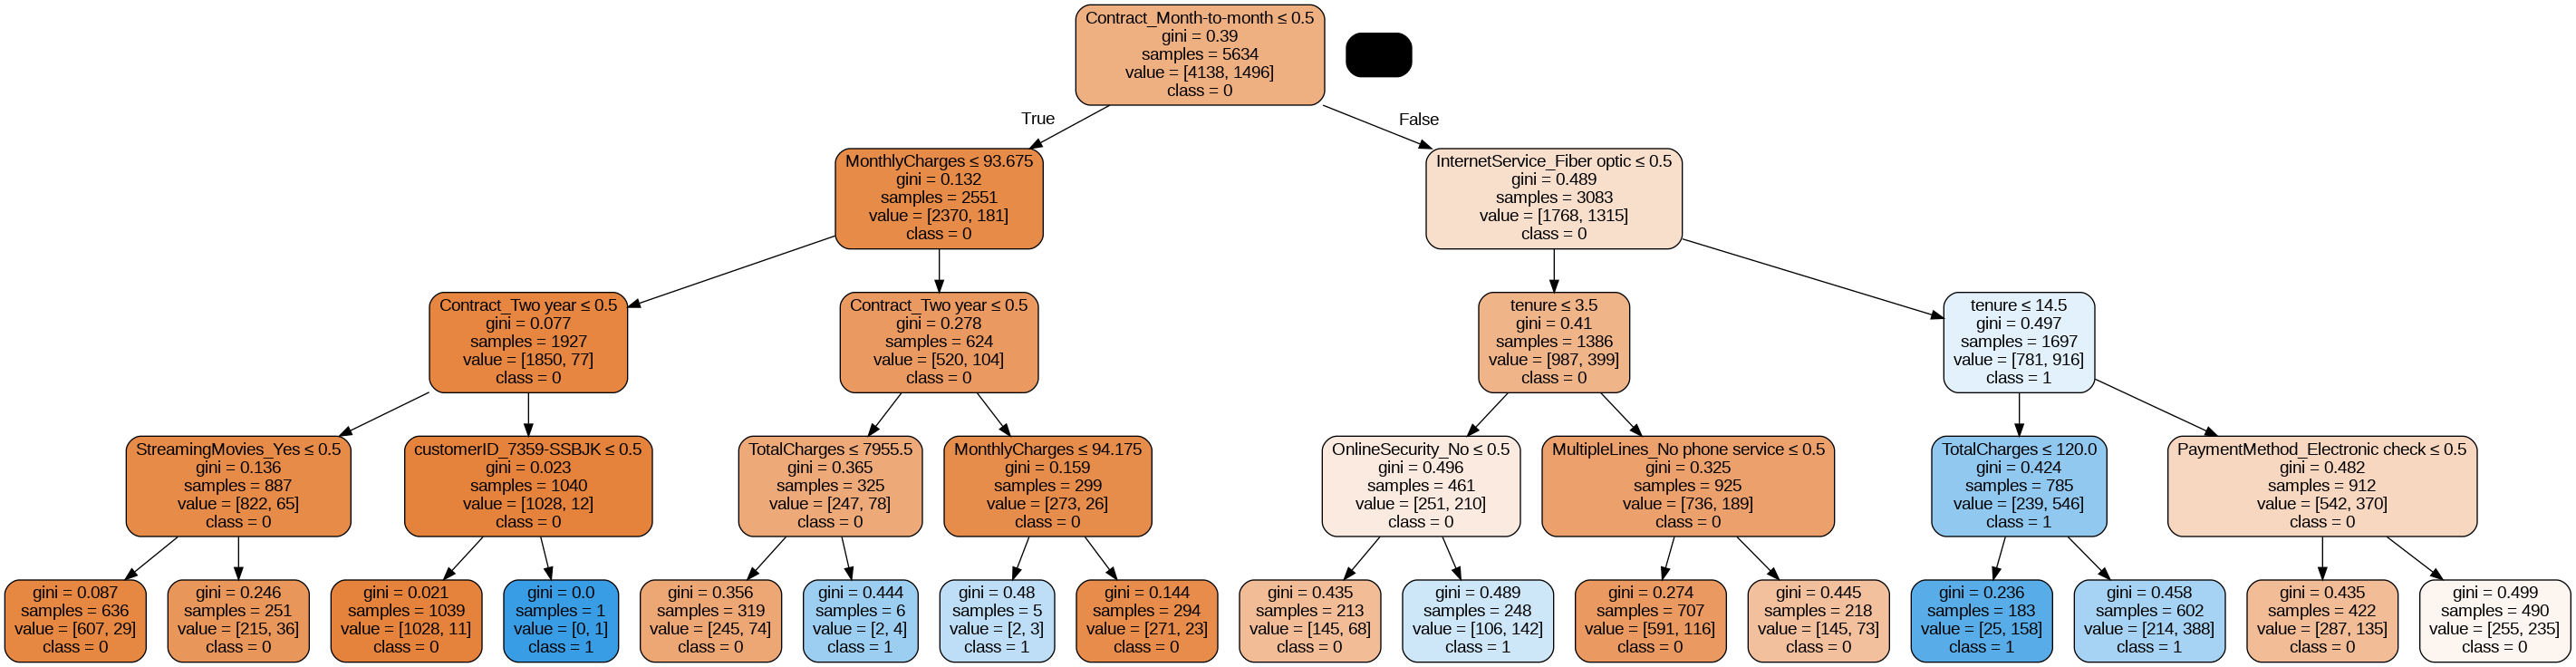

In [ ]:
dot_data = StringIO()
export_graphviz(dtree_g, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())